In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sys import path
path.append('./../spineSimulator/')
import plot
from importlib import reload
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

In [ ]:
# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='sans')

# Simlution grid (x,t) and size parameters

In [5]:
# x-grid
L = 1.e-6
nh, nhnj, nn, nndj, nd = 4, 1, 4, 1, 4
nx = nh + nhnj + nn + nndj + nd
x = np.linspace(0,L,nx)

# t-grid
T = 0.1e-3
timestep = 1.e-11  # use 100 picoseconds for explicit solver
nt = int(T/timestep)
t = np.linspace(0., T, nt+1)
print('timesteps {nt}'.format(nt=nt))

# spine shape
ah, an, ad = 250.e-9, 50.e-9, 400.e-9 
a = np.zeros(nx)
a[:nh]=ah
a[nh+nhnj:nh+nhnj+nn] = an
a[nh+nhnj+nn+nndj: nh+nhnj+nn+nndj+nd] = ad
a[nh:nh+nhnj]= np.linspace(ah, an, nhnj+2, endpoint=True)[1:-1]
a[nh+nhnj+nn : nh+nhnj+nn+nndj] = np.linspace(an, ad, nndj+2, endpoint=True)[1:-1]

timesteps 10000000


/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(xi,1)) for xi in ax.get_xticks() * 1.e9])
/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(yi,1)) for yi in ax.get_yticks() * 1.e9])


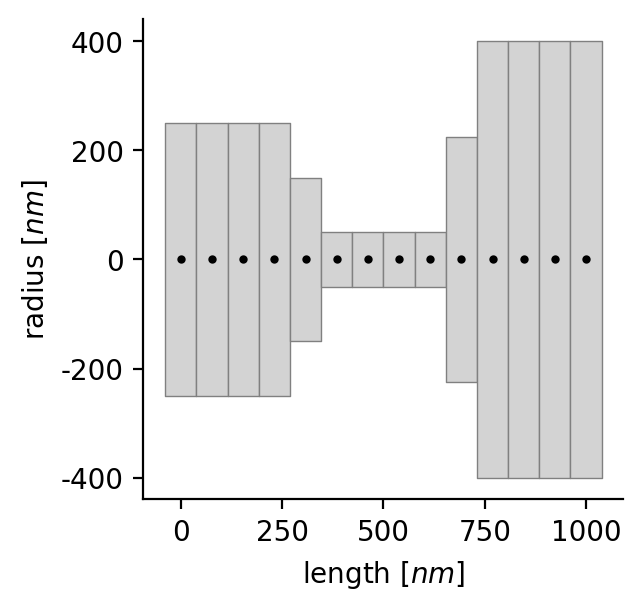

In [6]:
reload(plot)
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.x_grid_on_spine(fig, pos, x, a)

(-0.4, 0.4)

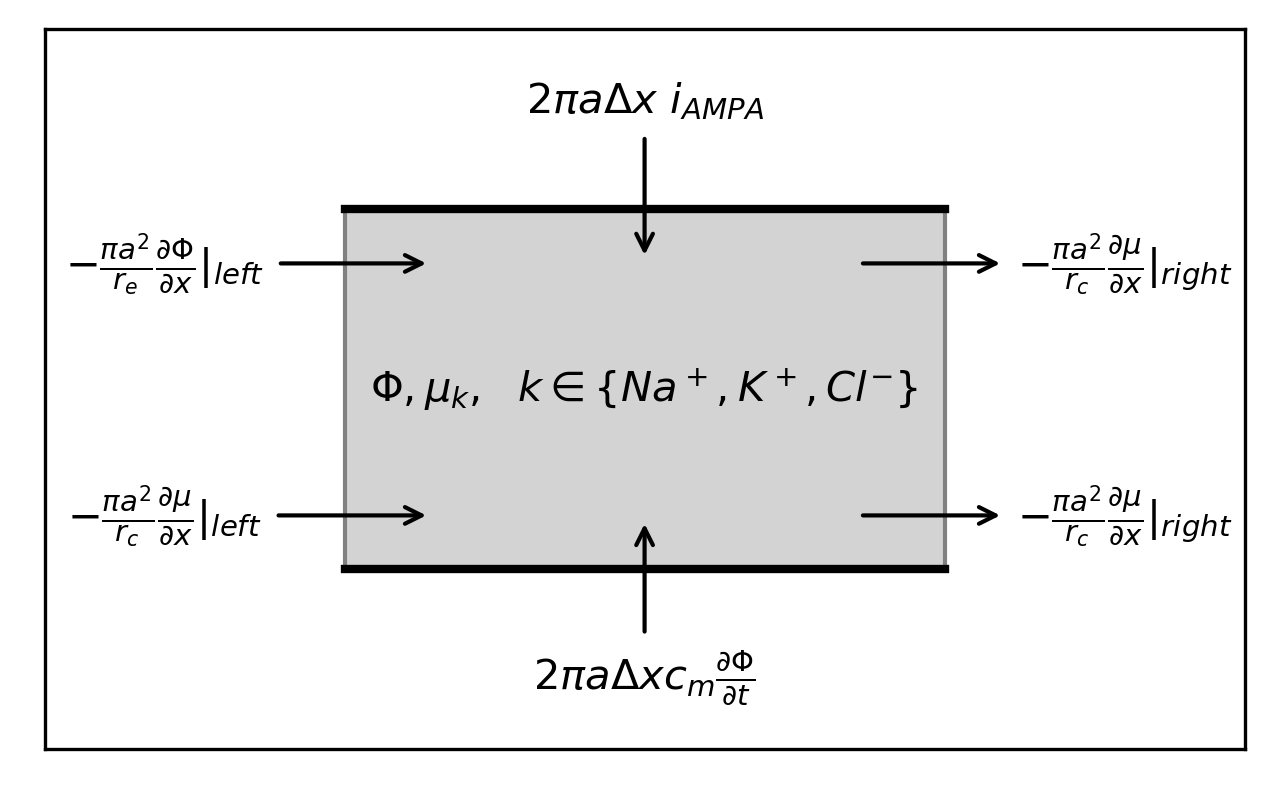

In [7]:


fig = plt.figure(facecolor='white', dpi=300, figsize=(5,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.set_xticks([])
ax.set_yticks([])


l = 0.6
h = 0.4

ax.fill_between([-l/2., l/2.],[-h/2.,-h/2.], [h/2., h/2.], facecolor='lightgrey', edgecolor='gray')
ax.plot([-l/2., l/2.],[-h/2.,-h/2.], 'k-', lw=2.)
ax.plot([-l/2., l/2.],[h/2.,h/2.], 'k-', lw=2.)


ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu}{\partial x }|_{left}$", 
            xy=(-l/2*0.7, -h/2*0.7), xytext=(-l*0.8, -h/2.*0.7), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_e}\frac{\partial \Phi}{\partial x }|_{left}$", 
            xy=(-l/2*0.7, h/2*0.7), xytext=(-l*0.8, h/2.*0.7), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu}{\partial x }|_{right}$", 
            xy=(l/2*0.7, h/2*0.7), xytext=(l*0.8, h/2.*0.7), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu}{\partial x }|_{right}$", 
            xy=(l/2*0.7, -h/2*0.7), xytext=(l*0.8, -h/2.*0.7), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.annotate(r"$2 \pi a \Delta x c_m \frac{\partial \Phi}{\partial t }$", 
            xy=(0., -h/2.*0.7), xytext=(0., -0.8*h), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$2 \pi a \Delta x ~ i_{AMPA}$",
            xy=(0., h/2.*0.7), xytext=(0., 0.8*h), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.text(0., 0., '$\Phi, \mu_k, ~~k \in \{{Na^+},{K^+},{Cl^{-}}\}$', va='center', ha='center')

ax.set_xlim([-l,l])
ax.set_ylim([-h,h])
